In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from reaches import readNHD

In [24]:
## Set-up
mdata_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/data/'
save_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/figures_width_length/'

In [25]:
# Define dtypes for lookup tables to preserve leading zeros
dtype_dic= {'HUC4': str, 'HUC2': str, 'toBasin': str, 'level': str}
# Read in HUC lookup table
lookup = pd.read_csv(os.path.join(mdata_path,
                                  'HUC4_lookup_no_great_lakes.csv'),
                     dtype=dtype_dic)

In [28]:
lookup

,slurm_index,HUC4,HUC2,toBasin,level
0,0,0101,01,NaN,0
1,1,0102,01,0105,0
2,2,0106,01,NaN,0
3,3,0107,01,NaN,0
4,4,0108,01,NaN,0
...,...,...,...,...,...
200,200,1027,10,1030,1
201,201,1204,12,NaN,1
202,202,0508,05,0509,0
203,203,0513,05,0514,0


In [27]:
np.max(lookup.slurm_index)

np.int64(204)

In [3]:
# Order of all possible bins for plotting
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]',
         '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]',
         '(100, 150]', '(150, 200]', '(200, 500]', '(500, 1000]']

Text(0, 0.5, 'Length [km]')

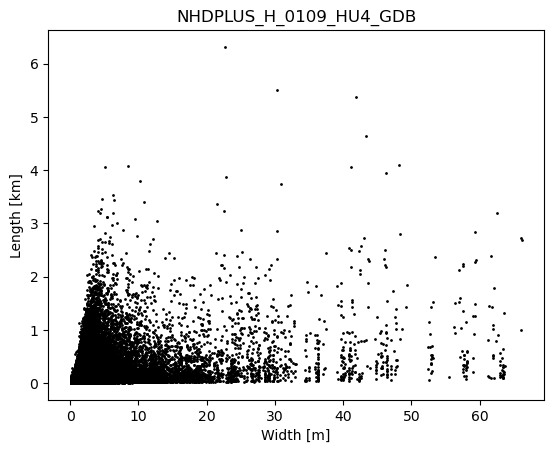

In [34]:
del basin, huc4
index = 5

# Read prepped NHD
basin, huc4 = readNHD(index=index)

# Plot width vs. length
plt.scatter(data=basin, x='WidthM', y='LengthKM', s=1,
        c='k')

plt.title(huc4)
plt.xlabel('Width [m]')
plt.ylabel('Length [km]')

# plt.savefig(fname=save_path + huc4 + '.png', bbox_inches='tight')

In [ ]:
for index in range(np.max(lookup.slurm_index) + 1):
    # Read prepped NHD
    basin, huc4 = readNHD(index=index)
    
    # Plot width vs. length
    plt.scatter(data=basin, x='WidthM', y='LengthKM', s=1,
            c='k')

    plt.title(huc4)
    plt.xlabel('Width [m]')
    plt.ylabel('Length [km]')

    # plt.savefig(fname=save_path + huc4 + '.png', bbox_inches='tight')